# Laptop Price Prediction

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#prepro">Data Pre-processing</a></li>
<li><a href="#train">Training and Evaluation</a></li>
<li><a href="#optimisation">Parameter Optimisation</a></li>
<li><a href="#saving">Model Saving</a></li>
<li><a href="#demo">Demonstration</a></li>
<li><a href="#conclusion">Conclusion</a></li>
</ul>

<a id='intro'></a>
### Introduction

In this notebook I attempt to create a model that uses the laptop data from this [kaggle page](https://www.kaggle.com/datasets/juanmerinobermejo/laptops-price-dataset) to predict laptop prices given known features of the laptop.

I use a gradient boosting regressor to predict the price and a label encoder to transform the columns into usable data.

##### Library Imports

In [1]:
import numpy as np 
import pandas as pd

from sklearn import ensemble
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV

%matplotlib inline

<a id='wrangling'></a>
### Data Wrangling

In [2]:
df = pd.read_csv('data/laptops.csv', index_col=0)

In [3]:
df.head()

,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
Laptop,,,,,,,,,,,
"ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core i5-1235U/8GB/512GB SSD/15.6""",New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
"Alurin Go Start Intel Celeron N4020/8GB/256GB SSD/15.6""",New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
"ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core i3-1215U/8GB/256GB SSD/15.6""",New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
"MSI Katana GF66 12UC-082XES Intel Core i7-12700H/16GB/1TB SSD/RTX3050/15.6""",New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
"HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB SSD/15.6""",New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2160 entries, ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core i5-1235U/8GB/512GB SSD/15.6" to Razer Book FHD+ Intel Evo Core i7-1165G7/16GB/256GB SSD/13.4" Táctil
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Status        2160 non-null   object 
 1   Brand         2160 non-null   object 
 2   Model         2160 non-null   object 
 3   CPU           2160 non-null   object 
 4   RAM           2160 non-null   int64  
 5   Storage       2160 non-null   int64  
 6   Storage type  2118 non-null   object 
 7   GPU           789 non-null    object 
 8   Screen        2156 non-null   float64
 9   Touch         2160 non-null   object 
 10  Final Price   2160 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 202.5+ KB


A lot of GPU values are missing which is understandable as a lot of laptops don't have a dedicated GPU, so we'll replace them with 'NA' values.

Then we'll drop the few remaining nulls which have either a missing screen or storage type values.

In [5]:
df.fillna({'GPU': "NA"}, inplace=True)
df.dropna(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2114 entries, ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core i5-1235U/8GB/512GB SSD/15.6" to Razer Book FHD+ Intel Evo Core i7-1165G7/16GB/256GB SSD/13.4" Táctil
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Status        2114 non-null   object 
 1   Brand         2114 non-null   object 
 2   Model         2114 non-null   object 
 3   CPU           2114 non-null   object 
 4   RAM           2114 non-null   int64  
 5   Storage       2114 non-null   int64  
 6   Storage type  2114 non-null   object 
 7   GPU           2114 non-null   object 
 8   Screen        2114 non-null   float64
 9   Touch         2114 non-null   object 
 10  Final Price   2114 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 198.2+ KB


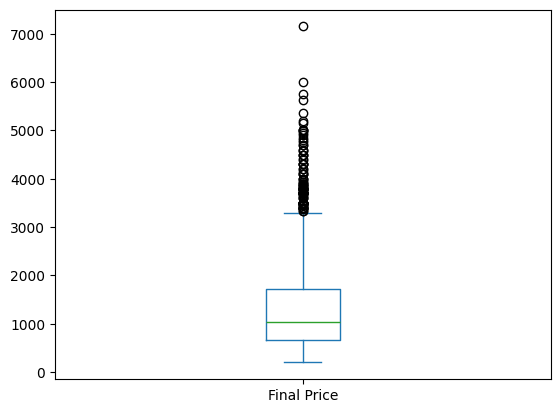

In [7]:
df["Final Price"].plot(kind="box");

Most of our outliers seem natural apart from that $7k laptop that I'm curious about. 

In [8]:
df[df["Final Price"] == df["Final Price"].max()]

,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
Laptop,,,,,,,,,,,
"MSI Raider GE78HX 13VH-065ES Intel Core i9-13950HX/32GB/2TB SSD/RTX 4080/17""",New,MSI,Raider,Intel Core i9,32,2000,SSD,RTX 4080,17.0,No,7150.47


I'm gonna drop this entry as I couldn't find a price near that range anywhere online.

In [9]:
df.drop(df.idxmax(), axis=0, inplace=True)

<a id='prepro'></a>
### Data Pre-processing

We need to apply an encoder to our data so the model can process it.

A one hot encoder here wouldn't be ideal as we have too many unique values in some of the columns, so we'll just apply a label encoder.

In [10]:
les = {}
for col in df:
    print(f'Column: {col}')
    print(df[col].unique())
    
    # transform string columns using label encoding
    if df[col].dtype == "object":
        print("Label Enconding: True")
        les[col] = LabelEncoder().fit(df[col])
        df[col] = les[col].fit_transform(df[col])
    else:
        print("Label Enconding: False")
    print()
    

Column: Status
['New' 'Refurbished']
Label Enconding: True

Column: Brand
['Asus' 'Alurin' 'MSI' 'HP' 'Lenovo' 'Medion' 'Acer' 'Apple' 'Razer'
 'Gigabyte' 'Dell' 'LG' 'Samsung' 'PcCom' 'Microsoft' 'Primux' 'Prixton'
 'Dynabook Toshiba' 'Thomson' 'Denver' 'Deep Gaming' 'Innjoo' 'Jetwing'
 'Millenium' 'Realme' 'Toshiba' 'Vant']
Label Enconding: True

Column: Model
['ExpertBook' 'Go' 'Katana' '15S' 'Crosshair' 'ThinkPad' 'VivoBook'
 'Akoya' 'Victus' 'V15' 'Thin' 'ROG' 'IdeaPad' 'Cyborg' 'M515UA' 'TUF'
 'Aspire' 'Pavilion' 'Vector' 'Omen' 'Creator' 'MacBook Air' 'ThinkBook'
 '250' 'Modern' '255' 'MacBook Pro' 'Prestige' 'Stealth' 'Pulse' 'ZenBook'
 'Blade' 'Chromebook' 'Legion' 'Raider' 'ProBook' 'F515' 'G5' 'Vostro'
 'Nitro' 'Gram' 'E410' 'Bravo' 'Aero' 'Yoga' 'Galaxy Book' 'Erazer'
 'Summit' 'Ultra' 'Extensa' 'Flex' 'EliteBook' 'Revolt' 'Latitude' 'Envy'
 'Deputy' 'Predator' 'Surface Laptop' 'Flex Advance' '14w' 'Titan'
 'Ioxbook' 'Aorus' 'Swift' 'Surface Go' 'Netbook Pro' 'Surface Pro'


We can see all the unique values in every column above and which ones require a label encoding.

I added them to the `les` dict short for label encodings.

We can take a look at its keys and values below.

In [11]:
for col, le in les.items():
    print(f'{col=}\n{le.classes_=}\n')

col='Status'
le.classes_=array(['New', 'Refurbished'], dtype=object)

col='Brand'
le.classes_=array(['Acer', 'Alurin', 'Apple', 'Asus', 'Deep Gaming', 'Dell', 'Denver',
       'Dynabook Toshiba', 'Gigabyte', 'HP', 'Innjoo', 'Jetwing', 'LG',
       'Lenovo', 'MSI', 'Medion', 'Microsoft', 'Millenium', 'PcCom',
       'Primux', 'Prixton', 'Razer', 'Realme', 'Samsung', 'Thomson',
       'Toshiba', 'Vant'], dtype=object)

col='Model'
le.classes_=array(['100e', '100w', '14S', '14w', '15S', '15U70N', '17', '250', '255',
       '300w', '470', 'A7', 'AURELION', 'AZIR', 'Aero', 'Akoya', 'Alpha',
       'Aorus', 'Aspire', 'BR', 'Beast', 'Blade', 'Book', 'Book Prime',
       'Bravo', 'Chromebook', 'Classmate Pro', 'ConceptD', 'Creator',
       'Crosshair', 'Cyborg', 'Delta', 'Deputy', 'E410', 'E510', 'Edge',
       'Electronics', 'EliteBook', 'Enduro', 'Envy', 'Erazer',
       'ExpertBook', 'Extensa', 'F415', 'F415EA', 'F515', 'Flex',
       'Flex Advance', 'G5', 'G7', 'GL65', 'GL75', 'Galaxy Book

<a id='train'></a>
### Model Training and Evaluation

In [12]:
features = df.iloc[:,:-1]
price = df['Final Price']

In [13]:
features.head()

,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch
Laptop,,,,,,,,,,
"ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core i5-1235U/8GB/512GB SSD/15.6""",0,3,41,16,8,512,0,11,15.6,0
"Alurin Go Start Intel Celeron N4020/8GB/256GB SSD/15.6""",0,1,53,13,8,256,0,11,15.6,0
"ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core i3-1215U/8GB/256GB SSD/15.6""",0,3,41,15,8,256,0,11,15.6,0
"MSI Katana GF66 12UC-082XES Intel Core i7-12700H/16GB/1TB SSD/RTX3050/15.6""",0,14,57,17,16,1000,0,18,15.6,0
"HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB SSD/15.6""",0,9,4,16,16,512,0,11,15.6,0


In [14]:
price.head()

Laptop
ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core i5-1235U/8GB/512GB SSD/15.6"    1009.00
Alurin Go Start Intel Celeron N4020/8GB/256GB SSD/15.6"                         299.00
ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core i3-1215U/8GB/256GB SSD/15.6"     789.00
MSI Katana GF66 12UC-082XES Intel Core i7-12700H/16GB/1TB SSD/RTX3050/15.6"    1199.00
HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB SSD/15.6"                        669.01
Name: Final Price, dtype: float64

In [15]:
train_features, test_features, train_target_price, test_target_price = train_test_split(features, price, train_size=0.75, random_state=2024)

I'm using a gradient boosting regressor to predict the price, as for the params this is the final iteration after I did some optimisation using grid search cross-validation on some and trial and error on a few others.

In [16]:
def train_model(X_train=train_features, Y_train=train_target_price):
    
    params = {
            # Tree-Specific 
            "max_depth": 4,
            "min_samples_split": 96,
            
            # Boosting 
            "n_estimators": 4003,
            "learning_rate": 0.02,
            "subsample": 0.8,
            
            # Miscellaneous 
            "loss": "squared_error",
            "max_features": "sqrt",
            "random_state": 2024
        }
    
    model = ensemble.GradientBoostingRegressor(**params)
    model.fit(X_train, Y_train)
    
    return model

For the evaluation I'll use two measures, the root mean square error (RMSE) and the R squared (R2) measure.

In [17]:
def evaluate_model(model, X_test=test_features, Y_test=test_target_price):
    
    Y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
    r2 = r2_score(Y_test, Y_pred)
    
    print(f"RMSE: {rmse:.4f}")
    print(f"R2: {r2:.4f}")
    
    return rmse, r2

In [18]:
model = train_model()

In [19]:
scores = evaluate_model(model)

RMSE: 318.6464
R2: 0.8918


We can see how the model did above but we'll try to do better by optimising some of the parameters using cross-validation grid search.

<a id='optimisation'></a>
### Parameter Optimisation

In [20]:
param_test = {'n_estimators':range(2, 10003,1000), 'learning_rate':np.arange(0.02,0.1, 0.01)}
gsearch = GridSearchCV(
    estimator=ensemble.GradientBoostingRegressor(
                                                max_features='sqrt',
                                                subsample=0.8,
                                                random_state=2024,
                                                loss='squared_error'
                                                ),
    param_grid=param_test,
    n_jobs=4,
    cv=5)
gsearch.fit(train_features, train_target_price)

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(max_features='sqrt',
                                                 random_state=2024,
                                                 subsample=0.8),
             n_jobs=4,
             param_grid={'learning_rate': array([0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]),
                         'n_estimators': range(2, 10003, 1000)})

In [21]:
gsearch.best_estimator_, gsearch.best_params_, gsearch.best_score_

(GradientBoostingRegressor(learning_rate=0.02, max_features='sqrt',
                           n_estimators=4002, random_state=2024, subsample=0.8),
 {'learning_rate': 0.02, 'n_estimators': 4002},
 0.8582833355835827)

Now we'll do another cv grid search with the params `n_estimators` and `learning_rate` set constant according to the previous search.

This time we'll run the search for `max_depth` and `min_samples_split`.

In [22]:
param_test = {'max_depth':range(2, 15,1), 'min_samples_split':range(90,103, 1)}
gsearch = GridSearchCV(
    estimator=ensemble.GradientBoostingRegressor(learning_rate=0.02,
                                                n_estimators=4003,
                                                max_features='sqrt',
                                                subsample=0.8,
                                                random_state=2024,
                                                loss='squared_error'
                                                ),
    param_grid=param_test,
    n_jobs=4,
    cv=5)
gsearch.fit(train_features, train_target_price)

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(learning_rate=0.02,
                                                 max_features='sqrt',
                                                 n_estimators=4003,
                                                 random_state=2024,
                                                 subsample=0.8),
             n_jobs=4,
             param_grid={'max_depth': range(2, 15),
                         'min_samples_split': range(90, 103)})

In [23]:
gsearch.best_estimator_, gsearch.best_params_, gsearch.best_score_

(GradientBoostingRegressor(learning_rate=0.02, max_depth=4, max_features='sqrt',
                           min_samples_split=96, n_estimators=4003,
                           random_state=2024, subsample=0.8),
 {'max_depth': 4, 'min_samples_split': 96},
 0.8582986470395113)

Ranges I tried for the last cv grid search:

max depth: `range(2,30, 2)` then narrowed down to `range(2,15, 1)`

min_samples_split: `range(100, 1001, 100)` then tried to `range(5, 100, 5)` then narrowed down to `range(90, 103, 1)`

Ending up with the following parameters:

```
params = {
            # Tree-Specific 
            "max_depth": 4,
            "min_samples_split": 96,
            
            # Boosting 
            "n_estimators": 4003,
            "learning_rate": 0.02,
            "subsample": 0.8,
            
            # Miscellaneous 
            "loss": "squared_error",
            "max_features": "sqrt",
            "random_state": 2024
        }
```

<a id='saving'></a>
### Model Saving

In [24]:
import pickle

I'll use the model's RMSE score as the name and save the model to the `models` folder.

In [25]:
with open(f'models/rmse{int(scores[0])}.pkl', 'wb') as f:
    pickle.dump(model, f)

I'll also save the label_encoders to a `label_encoders` folder so we can use them later.

In [26]:
for col, le in les.items():
    with open(f'label_encoders/{col}_le.pkl', 'wb') as f:
        pickle.dump(le, f)

<a id='demo'></a>
### Demonstration

Loading the model we saved and using it on a data point we input.

In [27]:
from utils import load_model, load_label_encoders, transform_data

In [28]:
model_path = f'models/rmse{int(scores[0])}.pkl'
model = load_model(path=model_path)

In [29]:
les = load_label_encoders(path='label_encoders')

In [30]:
data = {
        'Status':['New'],
        'Brand': ['Asus'],
        'Model': ['TUF'],
        'CPU': ['Intel Core i5'],
        'RAM': [16],
        'Storage': [512],	
        'Storage type': ['SSD'],	
        'GPU': ['RTX 3050'],
        'Screen': [15.6],	
        'Touch': ['No'],
            }

In [31]:
transformed_data = transform_data(data, les)
transformed_data

,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch
0,0,3,96,16,16,512,0,18,15.6,0


In [32]:
print(f"Price: {model.predict(transformed_data)[0]}")

Price: 1121.8276702344642


<a id='conclusion'></a>

### Conclusion

#### Summary 
- Trained a GradientBoostingRegressor model that predicts laptop prices using laptop features.
- Did some parameter optimisation using grid search cross-validation.
- Saved our model and label_encoders to the `models` and `label_encoders` folders for future use.

#### Limitations
The model is obviously not perfect as the data provided doesn't completely capture the price estimate of the laptop as the generation of the processor could play a huge role in determining the price, same with other features that would be more difficult to encode and capture.\
A solution for the above problem could be training the model on generation data, after collecting it of course.

Another limitation could be seen in the model giving more attention to features like `RAM` and `Storage` over the GPU for instance, and while it's true most of the time that more expensive laptops have higher RAM and storage alongside a high-end GPU, the model could be thrown off by passing high RAM and storage with low-end specs.